In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import yfinance as yf
import matplotlib

In [2]:
t = 50
num_params = 2

In [3]:
#alpha = np.linspace(0.99, 0.1, num = num_params)
#beta = np.linspace(0.0, 0.89, num = num_params)
# [ARCH, GARCH]
alpha = [0.3414, 0.3414]
beta = [0, 0.6586]

In [4]:
cond_var = lambda omega, alpha, epsilon, beta, sigma: omega + alpha*epsilon**2 + beta*sigma

In [5]:
spx = yf.download(['SPY'], start='2020-01-01', end='2020-06-01')['Close'].pct_change().iloc[1:].values*100
#t = len(spx)

[*********************100%***********************]  1 of 1 completed


In [6]:
#epsilon = np.random.normal(size=(t))
epsilon = np.full((t), 0)
epsilon[int(t/2)] = 8

In [7]:
#omega = np.linspace(1.5, 0.05, num_params)
#omega = [1.5174, 0.1185]
omega = [1, 1]
sigma_t = [[1]*len(alpha)]

In [8]:
for i, e in enumerate(epsilon):
    tmp = []
    for j, (a, b, o) in enumerate(zip(alpha, beta, omega)):
        tmp.append(cond_var(o, a, e, b, sigma_t[i][j]))
    sigma_t.append(tmp)

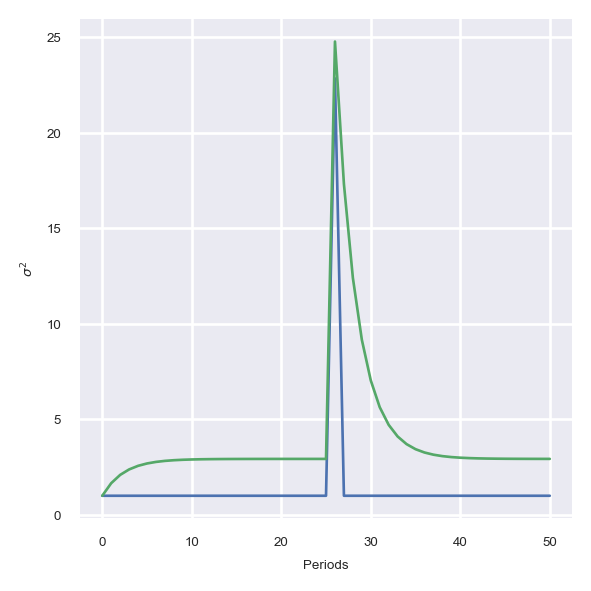

In [9]:
params = {'axes.labelsize': 5,
          'axes.titlesize': 5,
          'font.size': 4,
          'legend.fontsize': 4,
          'xtick.labelsize': 5,
          'ytick.labelsize': 5}

matplotlib.rcParams.update(params)


fig, ax = plt.subplots(1, 1, figsize=(3, 3), dpi=192)
ax.plot(sigma_t, linewidth = 1)
ax.set_xlabel("Periods")
ax.set_ylabel("$\sigma^2$")
plt.tight_layout()
#fig.bbox_inches = "tight"

In [359]:
matplotlib.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

In [354]:
import arch

In [223]:
model = arch.arch_model(spx, q = 1)
model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 448.32525147765335
Iteration:      2,   Func. Count:     14,   Neg. LLF: 448.1083985680799
Iteration:      3,   Func. Count:     21,   Neg. LLF: 446.8887944350864
Iteration:      4,   Func. Count:     29,   Neg. LLF: 445.87482669263943
Iteration:      5,   Func. Count:     36,   Neg. LLF: 445.68364797881907
Iteration:      6,   Func. Count:     42,   Neg. LLF: 445.50186771708013
Iteration:      7,   Func. Count:     51,   Neg. LLF: 445.5008135234715
Iteration:      8,   Func. Count:     57,   Neg. LLF: 445.497494982375
Iteration:      9,   Func. Count:     63,   Neg. LLF: 445.49749203153925
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 445.49749208445445
            Iterations: 9
            Function evaluations: 63
            Gradient evaluations: 9


                     Constant Mean - GARCH Model Results                      
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -445.497
Distribution:                  Normal   AIC:                           898.995
Method:            Maximum Likelihood   BIC:                           913.113
                                        No. Observations:                  252
Date:                Mon, Sep 13 2021   Df Residuals:                      251
Time:                        12:36:25   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.1625  6.841e-02      2.375  1.755e-02 [2.839e-0